In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

9it [00:00, 87.81it/s]

19it [00:00, 88.98it/s]

29it [00:00, 89.95it/s]

39it [00:00, 90.48it/s]

49it [00:00, 90.83it/s]

59it [00:00, 91.10it/s]

69it [00:00, 90.75it/s]

79it [00:00, 90.85it/s]

89it [00:00, 91.08it/s]

99it [00:01, 91.88it/s]

109it [00:01, 92.31it/s]

119it [00:01, 92.41it/s]

129it [00:01, 92.67it/s]

139it [00:01, 92.57it/s]

149it [00:01, 92.62it/s]

159it [00:01, 92.84it/s]

169it [00:01, 92.98it/s]

179it [00:01, 93.02it/s]

189it [00:02, 93.34it/s]

199it [00:02, 93.63it/s]

209it [00:02, 93.82it/s]

219it [00:02, 93.17it/s]

229it [00:02, 92.94it/s]

239it [00:02, 92.82it/s]

249it [00:02, 92.79it/s]

259it [00:02, 92.77it/s]

269it [00:02, 92.91it/s]

279it [00:03, 92.97it/s]

289it [00:03, 92.05it/s]

299it [00:03, 91.32it/s]

309it [00:03, 90.44it/s]

319it [00:03, 90.20it/s]

329it [00:03, 90.49it/s]

339it [00:03, 90.91it/s]

349it [00:03, 91.36it/s]

359it [00:03, 91.54it/s]

369it [00:04, 91.56it/s]

379it [00:04, 91.67it/s]

389it [00:04, 91.97it/s]

399it [00:04, 92.13it/s]

409it [00:04, 92.26it/s]

419it [00:04, 92.51it/s]

429it [00:04, 92.47it/s]

439it [00:04, 92.58it/s]

449it [00:04, 92.62it/s]

459it [00:04, 92.84it/s]

469it [00:05, 92.59it/s]

479it [00:05, 92.81it/s]

489it [00:05, 93.06it/s]

499it [00:05, 93.01it/s]

509it [00:05, 93.01it/s]

519it [00:05, 93.14it/s]

529it [00:05, 92.84it/s]

539it [00:05, 92.60it/s]

549it [00:05, 92.49it/s]

559it [00:06, 91.90it/s]

569it [00:06, 91.65it/s]

579it [00:06, 91.77it/s]

589it [00:06, 91.99it/s]

599it [00:06, 92.18it/s]

609it [00:06, 92.29it/s]

619it [00:06, 92.53it/s]

629it [00:06, 92.55it/s]

639it [00:06, 92.48it/s]

645it [00:06, 92.23it/s]


0it [00:00, ?it/s]

10it [00:00, 93.31it/s]

Number of empty sat catalogs is 0


20it [00:00, 93.12it/s]

30it [00:00, 93.01it/s]

40it [00:00, 93.06it/s]

50it [00:00, 92.99it/s]

60it [00:00, 92.94it/s]

70it [00:00, 93.22it/s]

80it [00:00, 93.46it/s]

90it [00:00, 92.91it/s]

100it [00:01, 93.00it/s]

110it [00:01, 92.95it/s]

120it [00:01, 93.24it/s]

130it [00:01, 93.18it/s]

140it [00:01, 93.11it/s]

150it [00:01, 93.10it/s]

160it [00:01, 93.34it/s]

170it [00:01, 93.37it/s]

180it [00:01, 93.21it/s]

190it [00:02, 93.34it/s]

200it [00:02, 92.85it/s]

210it [00:02, 92.73it/s]

220it [00:02, 92.46it/s]

230it [00:02, 92.67it/s]

240it [00:02, 92.51it/s]

250it [00:02, 92.67it/s]

260it [00:02, 92.72it/s]

270it [00:02, 92.57it/s]

280it [00:03, 93.01it/s]

290it [00:03, 93.20it/s]

300it [00:03, 93.64it/s]

310it [00:03, 93.56it/s]

320it [00:03, 94.30it/s]

330it [00:03, 93.69it/s]

340it [00:03, 93.73it/s]

350it [00:03, 93.66it/s]

360it [00:03, 93.10it/s]

370it [00:03, 93.18it/s]

380it [00:04, 93.49it/s]

390it [00:04, 93.34it/s]

400it [00:04, 93.34it/s]

410it [00:04, 93.56it/s]

420it [00:04, 93.77it/s]

430it [00:04, 93.82it/s]

440it [00:04, 93.93it/s]

450it [00:04, 94.02it/s]

460it [00:04, 94.72it/s]

470it [00:05, 94.22it/s]

480it [00:05, 94.08it/s]

490it [00:05, 93.88it/s]

500it [00:05, 93.66it/s]

510it [00:05, 93.61it/s]

520it [00:05, 93.71it/s]

530it [00:05, 93.69it/s]

540it [00:05, 93.80it/s]

550it [00:05, 94.03it/s]

560it [00:05, 94.19it/s]

570it [00:06, 94.21it/s]

580it [00:06, 93.63it/s]

590it [00:06, 93.27it/s]

600it [00:06, 93.10it/s]

610it [00:06, 92.92it/s]

620it [00:06, 92.83it/s]

630it [00:06, 93.07it/s]

640it [00:06, 93.26it/s]

645it [00:06, 93.35it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

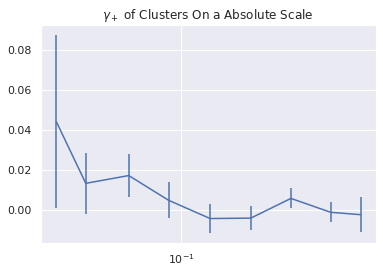

Aggregated xi:
[  0.      -1.5415  -2.8043  -6.7218  -3.0341   5.177    7.1765 -12.4413
   3.1133   1.7675]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -131.3321  -726.2354 -1146.426  -1578.4762 -2289.9842
 -2527.8823 -2268.021  -1327.5046  -150.4564]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   35.  213.  394.  645. 1166. 1695. 2213. 2363.  703.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.044  -0.0132 -0.0171 -0.0047  0.0044  0.0042 -0.0056  0.0013
  0.0025]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7523 -3.4096 -2.9097 -2.4472 -1.964  -1.4914 -1.0249 -0.5618
 -0.214 ]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

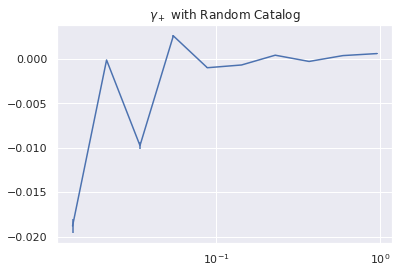

[-0.0188 -0.0001 -0.0097  0.0026 -0.001  -0.0007  0.0004 -0.0003  0.0004
  0.0006]
[ 7.4084e-04  3.9534e-06  3.8372e-04 -1.0311e-04  3.8333e-05  2.6127e-05
 -1.7312e-05  1.0442e-05 -1.5558e-05 -2.4494e-05]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

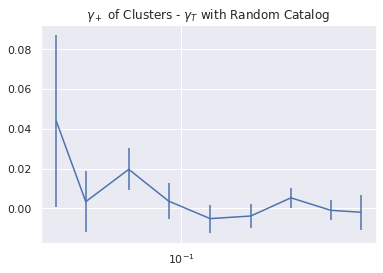

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

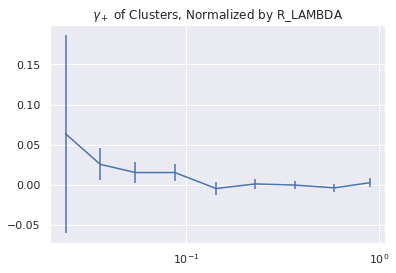

Aggregated xi:
[ 0.     -0.1911 -3.3317 -4.2065 -7.9878  3.9217 -1.7758  0.3606  8.7639
 -4.8622]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -11.2191  -432.346   -793.3995 -1261.5601 -1711.4622
 -2118.0377 -2032.0034 -1281.8219  -188.971 ]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    3.  130.  273.  518.  881. 1435. 2023. 2415. 1749.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0637 -0.0256 -0.0154 -0.0154  0.0045 -0.0012  0.0002  0.0036
 -0.0028]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7397 -3.3257 -2.9062 -2.4354 -1.9426 -1.476  -1.0045 -0.5308
 -0.108 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)